
# Finding and Plotting PHI Data

This example demonstrates how to search for, download, and plot 
Solar Orbiter PHI (Polarimetric and Helioseismic Imager) data using SunPy.

## PHI SOAR Product Codes:

**HRT (High Resolution Telescope)**  
 * `phi-hrt-blos` (Line-of-sight Magnetic Field)
 * `phi-hrt-bmag` (Total Magnetic Field Strength)
 * `phi-hrt-binc` (Inclination of Magnetic Field)
 * `phi-hrt-bazi` (Azimuth of Magnetic Field)
 * `phi-hrt-icnt` (Continuum Intensity)
 * `phi-hrt-stokes` (Stokes Parameters)
 * `phi-hrt-vlos` (Line-of-sight Velocity)

**FDT (Full Disc Telescope)**  

Currently, only **Continuum Intensity** (`phi-fdt-icnt`) and **Blos** (`phi-fdt-blos`) are available in SOAR.

Future releases will include:
 * `phi-fdt-bmag`
 * `phi-fdt-binc`
 * `phi-fdt-bazi`
 * `phi-fdt-stokes`
 * `phi-fdt-vlos`


In [1]:
import sunpy_soar
from sunpy.net import Fido, attrs as a
from astropy.time import Time
import sunpy.map
import sunpy.visualization.colormaps
import matplotlib.pyplot as plt

## Searching for PHI-HRT Blos Data

We first search for **Solar Orbiter PHI-HRT** (High Resolution Telescope) **Blos** data
in a given time range. The search results will return metadata about available files.



In [2]:
t_start_hrt = Time('2024-03-23T20:00', format='isot', scale='utc')
t_end_hrt = Time('2024-03-23T23:59', format='isot', scale='utc')

search_results_phi_hrt = Fido.search(a.Instrument('PHI'), a.Time(t_start_hrt.value, t_end_hrt.value), a.soar.Product('phi-hrt-blos'))

To search for two products simultaneously, use the '|' operator:
`results_phi = Fido.search(a.Instrument('PHI'), a.Time(t_start.value, t_end.value), (a.soar.Product('phi-hrt-blos') | a.soar.Product('phi-hrt-icnt')))`



In [3]:
print(search_results_phi_hrt)

Results from 1 Provider:

3 Results from the SOARClient:

Instrument Data product Level        Start time               End time        Filesize          SOOP Name           Detector Wavelength
                                                                               Mbyte                                                   
---------- ------------ ----- ----------------------- ----------------------- -------- ---------------------------- -------- ----------
       PHI phi-hrt-blos    L2 2024-03-23 22:30:09.921 2024-03-23 22:31:35.697   17.001 L_BOTH_HRES_HCAD_Major-Flare      HRT   6173.341
       PHI phi-hrt-blos    L2 2024-03-23 23:00:08.797 2024-03-23 23:01:34.683   17.001 L_BOTH_HRES_HCAD_Major-Flare      HRT   6173.341
       PHI phi-hrt-blos    L2 2024-03-23 23:30:08.808 2024-03-23 23:31:34.930   17.001 L_BOTH_HRES_HCAD_Major-Flare      HRT   6173.341




## Fetching the First Available PHI-HRT File

Once we have the search results, we fetch the first available file.
When a path isnt passed as a kwarg, the files will save locally into sunpy/data. 
You can also pass `path='./your/path/to/save/PHI/data/')` to choose where to save the data.



In [4]:
files_phi_hrt = Fido.fetch(search_results_phi_hrt[0, 0], path='./')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

## Loading and Plotting PHI-HRT Data

The downloaded file is in FITS format. We load it as a `sunpy.map.Map`
and adjust the plot settings for better visualization.



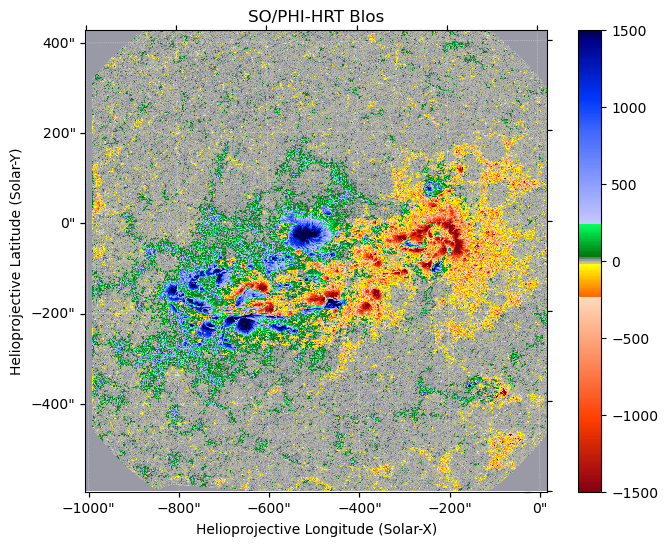

In [5]:
# Load the downloaded PHI-HRT Blos image
phi_hrt_blos_map = sunpy.map.Map(files_phi_hrt[0])

# Update the Plot settings
phi_hrt_blos_map.plot_settings['cmap'] = 'hmimag'
phi_hrt_blos_map.plot_settings['vmin'] = -1500
phi_hrt_blos_map.plot_settings['vmax'] = 1500

# Plot the PHI image
plt.figure(figsize=(8, 6))
phi_hrt_blos_map.plot()
plt.colorbar()
plt.title("SO/PHI-HRT Blos")
plt.show()

## Searching for PHI-FDT Blos Data

Now, we repeat the process for **Solar Orbiter PHI-FDT** (Full Disc Telescope) **Blos** data.



In [6]:
t_start_fdt = Time('2024-08-08T00:00', format='isot', scale='utc')
t_end_fdt = Time('2024-08-08T06:00', format='isot', scale='utc')

search_results_phi_fdt = Fido.search(a.Instrument('PHI'), a.Time(t_start_fdt.value, t_end_fdt.value), a.soar.Product('phi-fdt-blos'))
print(search_results_phi_fdt)

files_phi_fdt = Fido.fetch(search_results_phi_fdt[0, 0], path='./')

Results from 1 Provider:

1 Results from the SOARClient:

Instrument Data product Level        Start time               End time        Filesize             SOOP Name             Detector Wavelength
                                                                               Mbyte                                                        
---------- ------------ ----- ----------------------- ----------------------- -------- --------------------------------- -------- ----------
       PHI phi-fdt-blos    L2 2024-08-08 03:15:09.483 2024-08-08 03:16:09.323    2.589 R_FULL_LRES_LCAD_RS-Synoptics-Low      FDT       None




Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

## Loading, Rotating, and Masking PHI-FDT Data

The PHI-FDT data needs to be **rotated and recentered** for correct visualization.
We also apply a **mask to remove off-disc pixels**.



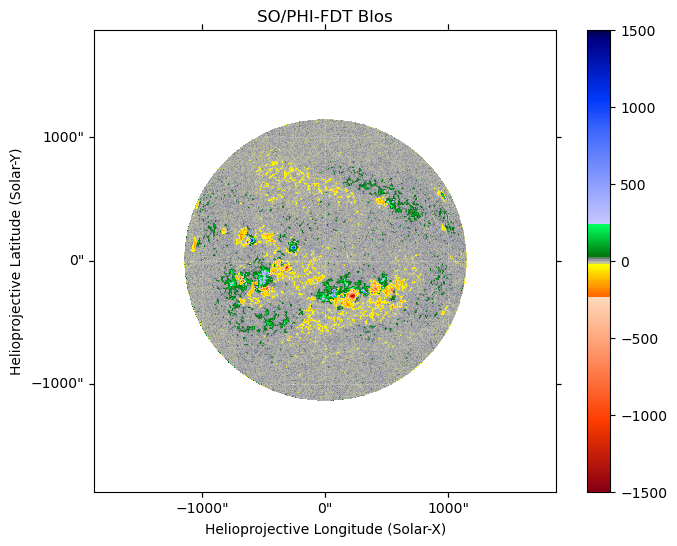

In [7]:
phi_fdt_blos_map = sunpy.map.Map(files_phi_fdt[0]).rotate(recenter = True) # Rotate the image to the correct orientation

#clean up the off-disc pixels for better visualization
#here we find the coordinators that are on the solar disk and create a mask
hpc_coords = sunpy.map.all_coordinates_from_map(phi_fdt_blos_map)
mask = ~sunpy.map.coordinate_is_on_solar_disk(hpc_coords)

#create a sunpy map object, with a mask which is applied when plotting
phi_fdt_blos_map = sunpy.map.Map(phi_fdt_blos_map.data,phi_fdt_blos_map.meta, mask=mask)

# Update the Plot settings
phi_fdt_blos_map.plot_settings['cmap'] = 'hmimag'
phi_fdt_blos_map.plot_settings['vmin'] = -1500
phi_fdt_blos_map.plot_settings['vmax'] = 1500

# Plot the PHI image
plt.figure(figsize=(8, 6))
phi_fdt_blos_map.plot()
plt.colorbar()
plt.title("SO/PHI-FDT Blos")
plt.show()